#### Initialize variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
grade_series = pd.Series(grades)

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
students = ['dmac', 'edev', 'joeb', 'tdog', 'txroy', 'sthicks', 'jfrerk', 'spickard', 'choenes', 'jsisson']
student_grades_series = pd.Series(grades, students)

df_people = pd.read_csv('files/people_data.csv')
small_df = df_people.iloc[:10,:].copy()
df_super = pd.read_csv('files/supermarket_sales.csv')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# What is Pandas?
<a id="pandas"> </a>

The `pandas` package is one of the most popular Python tools for data management and manipulation. `pandas` is built *on top* of `numpy`. Thus, much of the functionality and methods that are available in `numpy` are also available in `pandas`. 

## Installing Pandas
The`pandas` package is included with Anconda, but can be installed using either `conda` or `pip`.
```Python
# Use default channel
conda install pandas

# Specify the conda-forge channel
conda install -c conda-forge pandas

# Use pip
pip install pandas

```

## Set max rows/columns

To see more than the default number of rows and column, set the display options.

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

# Series and DataFrames
A pandas Series object is a one-dimensional labeled array that can hold any data type. It is one of two fundamental data structures provided by the pandas library. The other data structure is the DataFrame, which we'll examine next. Isolating a single column from a DataFrame results in a Series object.

A Series consists of two main components: the index and the data. The index provides labels for each element in the Series, allowing for easy and efficient data access and alignment. The data component contains the actual values.

You can create a Series using various data sources, such as lists, arrays, dictionaries, DataFrames, or even other Series objects. Here's an example of creating a Series from a list:

In [ ]:
grades = [88, 67, 100, 92, None, 95, 82, 100, 100, 95]
grade_series = pd.Series(grades)
grade_series

Note that a default index is added to the grades to create the series object.

Alternatively, you can specify an index. In this case, the stduent ID is provided as the index.

In [ ]:
grades = [88, 67, 100, 92, None, 95, 82, 100, 100, 95]
students = ['dmac', 'edev', 'joeb', 'tdog', 'txroy', 'sthicks', 'jfrerk', 'spickard', 'choenes', 'jsisson']
student_grades_series = pd.Series(grades, students)
student_grades_series

Understanding what type of object you're working with is important in any programming language. Different objects (classes) have different methods and attributes. A pandas Series object has different methods and attributes than a pandas DataFrame. Below is a partial listing of the methods available with Series objects.

## Series functions

### head()/tail()
View the first few or last few items in a Series using head/tail.

In [ ]:
grade_series.head(10)

In [ ]:
grade_series.tail()

### Math functions
* describe() - Display descriptive statistics of your data using the ```describe()``` function.
* sum()
* min()
* mode()
* max()
* mean()
* median()
* std()

In [ ]:
grade_series.describe()

In [ ]:
grade_series.min()

In [ ]:
grade_series.mode()

In [ ]:
grade_series.median()

In [ ]:
grade_series.min()

### Data Manipulation Functions
* isna() - checks for missing values (null/NaN)
* unique() - returns an list of unique values
* value_counts() - returns the fequencies of unique values
* apply(function) - applies a function to each element
* dropna() - returns a new series with missing values removed

### isna()
Use ```isna()``` to check for missing values. A True/False series is returned, which corresponds to each item in the series. True indicates the value is NaN or None. NaN means "Not a Number."

In [ ]:
grade_series.isna()

### unique() - Find unique values

In [ ]:
df_people.dtypes

In [ ]:
df_people['Occupation'].unique()

In [ ]:
print(grade_series.unique())

### apply() function
Use the apply function to modify every item in a series using a standard or custom function. In this example, we use a custom function to create a series containing the letter grade.

In [ ]:
def number_to_letter_grade(score):

    if score > 89:
        return "A"
    elif score > 79:
        return "B"
    elif score > 69:
        return "C"
    elif score > 59:
        return "D"
    else:
        return "F"
    

In [ ]:
number_to_letter_grade(88)

In [ ]:
grade_series

apply() - Modifying values using a function

In [ ]:
letter_series = grade_series.apply(number_to_letter_grade)

In [ ]:
letter_series

In [ ]:
grades_no_missing = grade_series.dropna()
grades_no_missing

Notice that the None/null/NaN item has been removed.

# Indexes

## Loading data and specifying an index
If the data you are loading has a column that should be used as an index, you can specify that column as the index. Although there are better attributes to use for an index, we could index individuals using their email address number using the following statement. Note that the Email column appears far left and in bold indicating is is the index. Also note that ```inplace=True``` was passed as a parameter which effectives "saves" the changes made to the index. Without that parameter, the DataFrame will display Email as the index, but the DataFrame remains unchanged.

In [ ]:
df_people.set_index('Email',inplace=True)
df_people.head()

In [ ]:
df_people.loc['s.miller@randatmail.com']

In [ ]:
# After
df_people = df_people.reset_index(drop=False)

In [ ]:
df_people

In [ ]:
# Before - didn't work
df_people.set_index(df_people['Marital Status'])

In [ ]:
df_people

In [ ]:
df_phone = df_people.set_index('Phone')

In [ ]:
df_phone

# Locating and Filtering data

In [ ]:
import pandas as pd
df_people = pd.read_csv('files/people_data.csv')
print(df_people.shape)
df_people.head()

## Using iloc()
The iloc function in pandas is used for indexing and selecting data from a DataFrame based on integer positions. It allows you to specify row and column indices to access specific data points or subsets of the DataFrame.

The general syntax of iloc is:

```Python
df.iloc[row_index(s), column_index(s)]


```

In [ ]:
# Return the first row. Since it is one-dimensional, it is returned as a Series.
df_people.iloc[1]

In [ ]:
# Select the first five rows and column indexes 0, 1, and 3.
df_people.iloc[:5,[0,1,3]]

In [ ]:
# Return the first 8 rows and first 4 columns (the 0 can be ommitted)
df_people.iloc[0:8,0:4]

In [ ]:
# Return rows 1, 3, and 5 and show only the first name, last name, and salary
df_people.iloc[[1,3,5],[0,1,9]]

## Using loc()
The ```loc()``` function in pandas is used for indexing and selecting data from a DataFrame based on labels. It allows you to specify row and column labels to access specific data points or subsets of the DataFrame.

The general syntax of loc is:

```Python
df.loc[row_label(s), column_label(s)]
```

In [ ]:
# If the requested value is not in the index, a KeyError exception is raised.
try:
    print(df_people.loc['r.sullivan@randatmail.com'])
except KeyError:
    print("KeyError: Confirm the value requested is in the indexed values.")

In [ ]:
df_people.set_index('Email', inplace=True)

In [ ]:
df_people.head()

In [ ]:
try:
    print(df_people.loc['r.sullivan@randatmail.com'])
except KeyError:
    print("KeyError: Confirm the value requested is in the indexed values.")

In [ ]:
df_people.loc[0:5, ['First Name', 'Last Name', 'Phone']]

In [ ]:
df_people

In [ ]:
married_filter = (df_people['Marital Status'] == "Married")

In [ ]:
df_email_index = df_people.loc[married_filter]
df_email_index.head()

## Using logic and multiple attributes to locate data
If we wanted to find Managers and Engineers who are married, we would use the following filter. Note the use of '&' for 'and' and the vertial bar '|' for 'or'.

In [ ]:
# married & (manager OR engineer)

multi_filter = (df_people['Marital Status'] == "Married")
multi_filter = multi_filter & (df_people['Occupation']=='Manager') | (df_people['Occupation']=='Engineer') | (df_people['Occupation'] == 'Lawer'))

In [ ]:
df_people.loc[multi_filter]

# Modifying data

## apply() function
Use the apply function to modify every item in a series using a standard or custom function. In this example, we use a custom function to create a series containing the letter grade.

## replace() function


## unique() and nunique()

The ```unique()``` function returns an array or list containing all the unique values present in a Series or column of a DataFrame. It eliminates any duplicates and provides a sorted array of unique values.

The ```nunique()``` function returns the count of unique values in a Series or column of a DataFrame. It provides the total number of distinct values, excluding any duplicates.

In [ ]:
occupations = df_people['Occupation'].unique().sort()
occupations

In [ ]:
df_people.loc[df_people['Occupation']=='Agronamist', 'Occupation']='Agronomist'

In [ ]:
df_people['Occupation'] = df_people['Occupation'].replace('Lawer','Lawyer')

In [ ]:
df_people['Occupation'].nunique()

In [ ]:
print(df_people['Education'].unique())
print(df_people['Education'].nunique())

# Grouping and Aggregating

Invoking the groupby() function on a DataFrame returns a pandas groupby object.

In [ ]:
occupation_grp = df_people.groupby('Occupation')

Specify the columns of interest and the aggregation function, for example, mean(), to diplay the results.

In [ ]:
by_salary = df_people.groupby('Occupation')[['Experience (Years)', 'Salary']].mean()

In [ ]:
by_salary.head()

In [ ]:
by_salary.sort_values(['Salary'], ascending=False).head()

In [ ]:
by_salary.sort_values(['Salary'], ascending=True).head()

You can also group by multiple columns. We can group by occupations and then gender to examine the difference in experience and salary between genders in the same occupation.

In [ ]:
df_people.groupby(['Occupation','Gender'], as_index=False)[['Experience (Years)', 'Salary']].mean().head(10)

In [ ]:
df_people.groupby(['Occupation','Gender'], as_index=False)[['Experience (Years)', 'Salary']].agg(['mean','min','max']).head(6)

In [ ]:
df_people['Experience (Years)'].unique()

In [ ]:
df_people['Experience (level)']= pd.cut(df_people['Experience (Years)'], bins=3, labels=('low','medium','high'))

In [ ]:
df_people.groupby(['Experience (level)'])[['Salary','Experience (Years)']].agg(['min','max','mean','median','std'])

In [ ]:
df_people.head(50)

In [ ]:
df_people.groupby(['Experience (level)'])['Salary'].median()

In [ ]:
df_people.groupby(['Experience (level)'])['Salary'].median()

In [ ]:
df_people.groupby(['Experience (level)', 'Gender'])['Salary'].mean()

In [ ]:
occupation_grp.get_group('Engineer')

In [ ]:
salaries_df = occupation_grp['Salary'].agg(['median','mean'])
salaries_df

# Handling Missing Values
Missing values are a common problem when performing data analysis. This section discusses ways to handle missing values.

In [5]:
import random
import numpy as np

import pandas as pd
df_people = pd.read_csv('files/people_data.csv')

In [10]:
df_people.isna().sum().sum()

0

First, to make it easier, we'll create a small subset of the people DataFrame. Note the use of ```copy()```. Using ```copy()``` creates a *deep copy* of the DataFrame. This avoids making changes to a slice or shallow copy of the DataFrame, which would yield unpredictable results and an exception

In [12]:
def create_small_df_nan(num_missing):
    small_df = df_people.iloc[:10,:].copy()

    for x in range(num_missing):
        random_row = random.randint(0,9)
        random_col = random.randint(0,9)
        small_df.iloc[random_row, random_col] = np.NaN

    # Add a column of NaN values
    small_df['SS#'] = np.NaN

    # Add a row of NaN values
    small_df.loc[len(small_df.index)] = np.NaN
        
    return small_df

In [ ]:
small_df.head()
small_df.shape

## Finding Missing Values

First, let's sum the number of missing values in each column.

In [ ]:
small_df.isna().sum()

Since we do not have any missing values, we'll randomly add missing values using the ```np.NaN``` object and create one row and column of NaN values.

In [13]:
# Introduce missing (NaN) values into the small DataFame

small_df_nan = create_small_df_nan(5)

In [14]:
small_df_nan.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children,SS#
0,amy,moore,Female,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0,NaN
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0,NaN
2,garry,cooper,Male,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11.0,149123.0,Single,3.0,NaN
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0,NaN
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0,NaN
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0,NaN
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0,NaN
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,NaN,140405.0,Married,0.0,NaN
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,NaN,Scientist,6.0,194147.0,Married,3.0,NaN
9,adrianna,kelley,Female,NaN,a.kelley@randatmail.com,251-3368-86,Upper secondary,Actor,0.0,160569.0,Married,1.0,NaN


In [ ]:
# Set Salary to string to demonstrate casting error later
df_people['Salary'] = df_people['Salary'].astype(str)

Our results should indicate that an entire row, the SS# column, and up to five additional values are missing. 

We'll confirm by summing the columns again.

In [15]:
small_df_nan.isna().sum()

First Name             1
Last Name              1
Gender                 1
Age                    2
Email                  2
Phone                  1
Education              2
Occupation             1
Experience (Years)     2
Salary                 1
Marital Status         1
Number of Children     1
SS#                   11
dtype: int64

The syntax of ```dropna``` is as follow:

```Python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

- **axis**: drop rows (```axis=0```) or columns (```axis=1```) which contain missing values
- **how**: drop (row|column) if it contains ```any``` missing value; only drop (row|column) if ```all``` values are missing

## Drop Missing Values

Notice in the code block above that the entire SS# has missing values. To delete all columns (axis=1) in which all values are missing, specify the axis as 1 and 'all' as the ```how``` parameter.

In [16]:
df_na = small_df_nan.dropna(axis=1, how='all')
df_na.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,amy,moore,Female,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0
2,garry,cooper,Male,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11.0,149123.0,Single,3.0
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,NaN,140405.0,Married,0.0
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,NaN,Scientist,6.0,194147.0,Married,3.0
9,adrianna,kelley,Female,NaN,a.kelley@randatmail.com,251-3368-86,Upper secondary,Actor,0.0,160569.0,Married,1.0


Note that the SS# has been deleted.

Of course, we can do the same with row 10 by changing the axis value from 1 (columns) to 0 (rows).

In [17]:
df_na = df_na.dropna(axis=0, how='all')

In [18]:
df_na.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,amy,moore,Female,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0
2,garry,cooper,Male,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11.0,149123.0,Single,3.0
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,NaN,140405.0,Married,0.0
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,NaN,Scientist,6.0,194147.0,Married,3.0
9,adrianna,kelley,Female,NaN,a.kelley@randatmail.com,251-3368-86,Upper secondary,Actor,0.0,160569.0,Married,1.0


Note that row 10 has been deleted. However, there should be randomly missing values in other rows. Use ```isna().sum()``` to total the missing values by column.

In [19]:
df_na.isna().sum()

First Name            0
Last Name             0
Gender                0
Age                   1
Email                 1
Phone                 0
Education             1
Occupation            0
Experience (Years)    1
Salary                0
Marital Status        0
Number of Children    0
dtype: int64

Although, it is not generally advisable to do so, you can delete any rows that have a missing value in any column.

In [20]:
# axis=0 refers to rows; axis=1 refers to columns
# 'any' means that any row (axis=0) or column (axis=1) with an missing value will be deleted
df_na = df_na.dropna(axis=0, how='any')
df_na.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,amy,moore,Female,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0
2,garry,cooper,Male,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11.0,149123.0,Single,3.0
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0


In [21]:
df_na.isna().sum()

First Name            0
Last Name             0
Gender                0
Age                   0
Email                 0
Phone                 0
Education             0
Occupation            0
Experience (Years)    0
Salary                0
Marital Status        0
Number of Children    0
dtype: int64

Instead, you may want to only delete rows that have missing values in a specific column. To do that, use the subset

In [ ]:
small_df_nan.head(11)

In [ ]:
small_df_nan.isna().sum()

In [ ]:
small_df_nan.dropna(subset=['Email'], inplace=True)

In [ ]:
small_df_nan.isna().sum()

## Fill Missing Values

In [ ]:
# fillna(0)

# How to delete a row in a DataFrame by index value
The last row, the 11th row, index value 10, is all NaN's. To specifically delete row with index value 10, call the ```drop()``` function and specify the row index. Note that this will not modify the dataset unless ```inplace=True``` is specified.

In [ ]:
small_df.head(11)

In [ ]:
small_df.drop(10)

### Sum the count of missing values by column

In [ ]:
small_df.isna().sum()

## Sum of missing values for entire DataFrame

In [ ]:
small_df.isna().sum().sum()

# Casting Data Types
After creating a pandas DataFrame, you may have columns that have not been defined using the correct data type. For example, after using the ```read_csv()``` function to create the people_df, salary is defined as an integer instead of a float. 

In [ ]:
df_people.dtypes

In [ ]:
df_people['Salary'] = df_people['Salary'].astype(int)

# Working with Time Series Data
Often, after reading data into a DataFrame, the implied data types of columns will need to be modified to reflect the data contained in the columns.

For example, in the DataFrame below, the Date and Time columns are strings (dtype object), not datetime objects. To work with the date column as a date object, we'll need to convert the Date column from a string to a datetime object.

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [ ]:
df_super.info()

Attempting to use a date function prior to converting the string to a date will, of course, result in an error.

In [ ]:
df_super = pd.read_csv('files/supermarket_sales.csv')

In [ ]:
# ERROR: Using a date function on a string (object), throws an error
df_super.iloc[1]['Date'].day_name()

In [ ]:
df_super['Date'] = pd.to_datetime(df_super['Date'], format='%m/%d/%Y')
df_super.iloc[1]['Date'].day_name()

In [ ]:
# Add a column with the day name of the transaction
df_super['day_name'] = df_super['Date'].dt.day_name()

In [ ]:
df_super.head()

To convert these to datetime objects 

# Joining, Concatenating, and Merging DataFrames

In [46]:
emp1 = {'Name':['Joe', 'Eric', 'Terry', 'Troy'], 
        'Age':[57, 52, 42, 37], 
        'City':['Columbia', 'Dallas', 'Tuscon', 'Austin'], 
        'Degree':['BA', 'PhD', 'MS', 'MD']} 
   
emp2 = {'Name':['Suzanne', 'Julie', 'Tripti', 'Sarah'], 
        'Age':[22, 39, 41, 21], 
        'City':['Columbia', 'Austin', 'Lansing', 'St. Louis'], 
        'Degree':['BA', 'MA', 'JD', 'BS']} 
 
# Convert the dictionary into DataFrame  
emp1_df = pd.DataFrame(emp1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
emp2_df = pd.DataFrame(emp2, index=[4, 5, 6, 7])
 
emp1_df.head()

,Name,Age,City,Degree
0,Joe,57,Columbia,BA
1,Eric,52,Dallas,PhD
2,Terry,42,Tuscon,MS
3,Troy,37,Austin,MD


In [47]:
emp2_df

,Name,Age,City,Degree
4,Suzanne,22,Columbia,BA
5,Julie,39,Austin,MA
6,Tripti,41,Lansing,JD
7,Sarah,21,St. Louis,BS


In [49]:
emp_full = pd.concat([emp1_df, emp2_df])

In [50]:
emp_full.head(10)

,Name,Age,City,Degree
0,Joe,57,Columbia,BA
1,Eric,52,Dallas,PhD
2,Terry,42,Tuscon,MS
3,Troy,37,Austin,MD
4,Suzanne,22,Columbia,BA
5,Julie,39,Austin,MA
6,Tripti,41,Lansing,JD
7,Sarah,21,St. Louis,BS


# Basic Visualization with Pandas

Data visualization is an important aspect of working with data. 
- It enables the data to clearly tell a story
- Facilitates decision-making
- Helps to gain insights
- Provides a visual method to examine validity of data (e.g., visually identify outliers)
- Discover trends and identify patterns in data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's start with a very simple visualation by plotting grades.

In [33]:
plt.style.use('dark_background')

In [26]:
student_grades_series

dmac         88.0
edev          NaN
joeb        100.0
tdog         92.0
txroy         NaN
sthicks      95.0
jfrerk       82.0
spickard    100.0
choenes     100.0
jsisson      95.0
dtype: float64

In [25]:
df1 = student_grades_series.fillna(0)

In [32]:
df1

dmac         88.0
edev          0.0
joeb        100.0
tdog         92.0
txroy         0.0
sthicks      95.0
jfrerk       75.0
spickard    100.0
choenes     100.0
jsisson      95.0
dtype: float64

Plotting in Pandas is as simple as calling the plot() method on the DataFrame. The ```plot()``` method is a wrapper around Pyplot, which is a collection of functions built on top of Matplotlib. Matplot lib is a much more power, but more complex module for creating visualizations.

<Axes: >

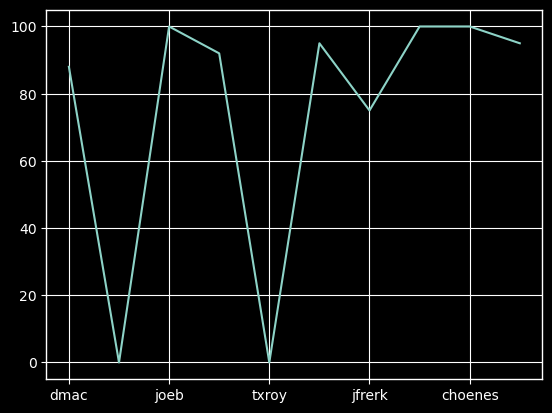

In [34]:
df1.plot()

<Axes: >

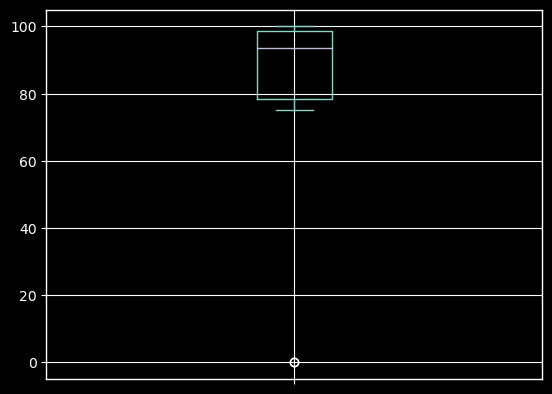

In [35]:
df1.plot(kind='box')

In [30]:
df1.loc['jfrerk']=75

In [ ]:
df1.plot(kind='box')

In [39]:
df_people.columns

Index(['First Name', 'Last Name', 'Gender', 'Age', 'Email', 'Phone',
       'Education', 'Occupation', 'Experience (Years)', 'Salary',
       'Marital Status', 'Number of Children'],
      dtype='object')

In [41]:
df_sal_exp = df_people.groupby('Gender')['Salary'].mean()
df_sal_exp

Gender
Female    113366.093750
Male      117278.567308
Name: Salary, dtype: float64

<Axes: title={'center': 'Salary Comparison'}, xlabel='Gender'>

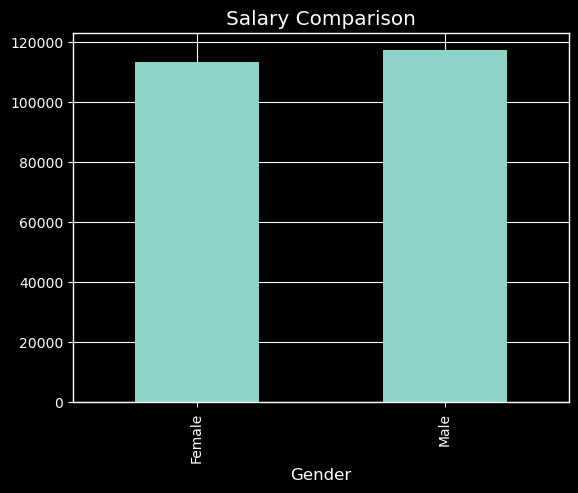

In [42]:
df_sal_exp.plot(kind='bar', title="Salary Comparison")

In [43]:
df_sal_exp.transpose()

Gender
Female    113366.093750
Male      117278.567308
Name: Salary, dtype: float64

<Axes: title={'center': ' Salary Comparison'}, xlabel='Gender', ylabel='USD'>

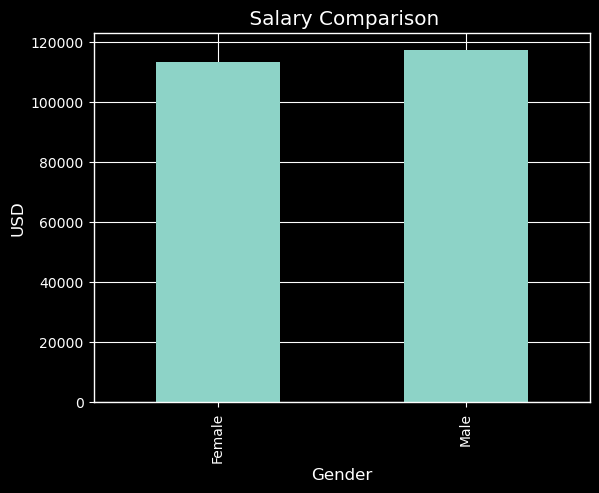

In [44]:
df_sal_exp.transpose().plot(kind='bar', title=' Salary Comparison', xlabel='Gender', ylabel = 'USD')

In [ ]:
df_people.dtypes

In [ ]:
df_people['Salary'] = df_people['Salary'].astype(float)

In [ ]:
df_salary_education = df_people.groupby('Education')['Salary'].mean()
df_salary_education.sort_values(ascending=False).plot(kind='bar')

In [ ]:
df_super.dtypes

In [ ]:
df_super['Date'] = pd.to_datetime(df_super['Date'])

In [ ]:
df_super.head()

In [ ]:
df_super_qtr = df_super.resample('M', on='Date').sum()

In [ ]:
df_super['Date'].max()

In [ ]:
df_super_qtr.head()

<Axes: >

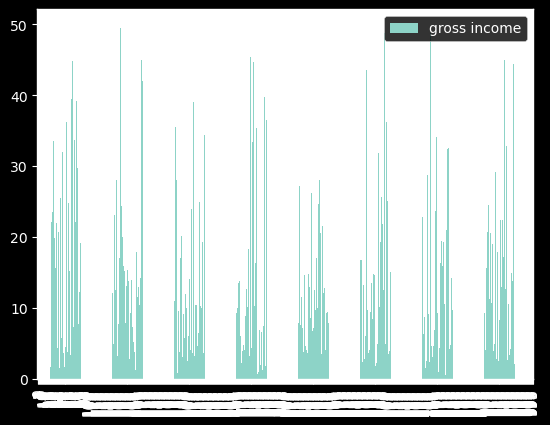

In [45]:
df_super[['Branch','gross income']].plot(kind='bar')

# Interacting with Excel, JSON, Parquet files, SQL

# Using Polars with Pandas

## 

# Initialize everything

This section is provided to quickly re-load the series and dataframe objects used in this notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
grade_series = pd.Series(grades)

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
students = ['dmac', 'edev', 'joeb', 'tdog', 'txroy', 'sthicks', 'jfrerk', 'spickard', 'choenes', 'jsisson']
student_grades_series = pd.Series(grades, students)

df_people = pd.read_csv('files/people_data.csv')
small_df = df_people.iloc[:10,:].copy()
df_super = pd.read_csv('files/supermarket_sales.csv')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)